## Homework Set 6 - Connor Johnson

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import root
from scipy.misc import derivative
from scipy.signal import argrelextrema
import sympy as sp
import fractions as fra
import math
from math import exp
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'png'
from matplotlib import pyplot as plt

from itertools import product, chain, accumulate, repeat

plt.rcParams["font.family"]='Times New Roman'
plt.rcParams["mathtext.fontset"]='stix'
# set fontsize in markdown cells
from IPython.core.display import display, HTML, Math, Latex
display(HTML("<style>.rendered_html { font-size: 16px; }</style>"))

In [2]:
# Phase portrait: streamplot
def PP_2d(x1,x2,y1,y2,f1,f2,ax,nx=100,ny=100,dens=[1,1],lw=1,col='k'):
    ax = ax or plt.gca()
    x = np.linspace(x1,x2,nx)
    y = np.linspace(y1,y2,ny)
    X,Y = np.meshgrid(x,y)
    U = f1(X,Y); V = f2(X,Y)
    ax.streamplot(X,Y,U,V,density=dens,
                 linewidth=lw,color=col,arrowstyle='->')
    return ax

# Phase portrait: nullclines
def PP_nc(x1,x2,y1,y2,f1,f2,ax,nx=100,ny=100,lw=1,c1='m',c2='b'):
    ax = ax or plt.gca()
    x = np.linspace(x1,x2,nx)
    y = np.linspace(y1,y2,ny)
    X,Y = np.meshgrid(x,y)
    U = f1(X,Y); V = f2(X,Y)    
    ax.contour(X,Y,U,[0],colors='m')
    ax.contour(X,Y,V,[0],colors='b')
    return ax   

# Display fixed points
def PP_FPs(FPs,tau,delta,ax, print_stable = False):
    ax = ax or plt.gca()
    for j in np.arange(len(FPs)):
        FP_ = np.array(FPs[j],dtype=float) 
        if tau[j]<0 and delta[j]>0:
            if print_stable:
                print('stable FP: ',FP_)
            ax.plot(FP_[0],FP_[1],'ro',ms=8,mfc='r',mec='r',lw=2)
        else:
            if print_stable:
                print('unstable FP: ',FP_)
            ax.plot(FP_[0],FP_[1],'ro',ms=8,mfc='w',mec='r',lw=2)
    return ax

# Bifurcation diagram: x vs r
def BF_diag(f,x1,x2,r1,r2,nx=80,nr=80,title='',x_lab='$r$'):
    fx = lambda x,r: derivative(f,x,dx=1e-6,args=(r,))
    x=np.linspace(x1,x2,nx)
    r=np.linspace(r1,r2,nr)
    R,X = np.meshgrid(r,x)
    Z = f(X,R)
    Zx= fx(X,R)
    Zu= np.ma.masked_where(Zx<0,Z)
    Zs= np.ma.masked_where(Zx>0,Z)
    fig, ax=plt.subplots()
    ax.contour(R,X,Zs,levels=[0],colors='k',linewidths=3)
    ax.contour(R,X,Zu,levels=[0],colors='k',linewidths=3,linestyles='dashed')
    ax.grid()
    ax.set_xlabel(x_lab)
    ax.set_ylabel('$x^\star$')
    ax.set_title(title,color='b')
    plt.show()   

#generates nested list
def NestList(f,x0,n0):
    return [a for a in accumulate(repeat(x0,n0),f)]

#applies function f n-times to x
def Nest(f,x,n):
    if n==0:
        return x
    return Nest(f,f(x),n-1)

# define Logistic Map (LM) and LM series
def logistic_series(x0,r,n):
    f_LM = lambda x,r: r*x*(1-x)
    f = lambda x,_: f_LM(x,r)
    return NestList(f,x0,n)

### Problem 1

#### Part (a)

Cubic Map: $x_{n+1}=f(x_n)=x_n(r-x_n^2)$
<br>Solving for the fixed points:
<br>$f(x^*)=x^*\rightarrow x^*(r-(x^*)^2)=x^*$
<br>$r-(x^*)^2=1\rightarrow x^* = \pm \sqrt{r-1}$
<br>There are three fixed points. One of them is $x^*=0$, which exists for all values of $r$. The other two is $x^* = \pm \sqrt{r-1}$, which only exist if $r\geq 1$.

$f'(x)=r-3x^2$
<br>Determining Stability:
<br>$x^*=0$: $|f'(x^*)|=r$. This means that the fixed point is table if $|r|<1$, unstable otherwise.
<br>$x^*=\pm \sqrt{r-1}$: $|f'(x^*)|=|-2r+3|$. Since the fixed points only exist if $r\geq 1$, it is stable when $1<r<2$, marginal cases when $r=1,2$, and unstable otherwise.

#### Part (b)

$f^2(x)=x\rightarrow r(rx-x^3)-(rx-x^3)^3=x \rightarrow r(rx-x^3)-(rx-x^3)^3-x=0$

In [3]:
x,r,p,q = sp.symbols('x,r,p,q',nonnegative=False)
roots= sp.factor(r*(r*x-x**3)-(r*x-x**3)**3-x)
display(Latex('${}=0$'.format(sp.latex(roots))))

<IPython.core.display.Latex object>

The above equation is $f^2(x)=x$ factored out and equaled to zero. Using it, it is possible to find all roots $p$ and their corresponding $q=f(p)$ to accquire all 2-cycles.

In [4]:
f = lambda x,r: r*x-x**3
f_2_factored = lambda x,r: x*(-r+x**2-1)*(-r+x**2+1)*(-r*x**2+x**4+1)
_q = lambda root: sp.simplify(sp.Add(sp.Mul(r,root), sp.Mul(sp.Integer(-1),sp.Pow(root,3))))

roots = sp.roots(f_2_factored(x,r), x)
p_q = [display(Latex('$p={}$, $q={}$'.format(sp.latex(root), 
                                             sp.latex(_q(root)))))
                                             for root in list(roots.keys())[2:8]]

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Part (c)

$f'(x) = r - 3x^2$, $\lambda=f'(p)f'(q)$
<br>$\lambda=(r-3p^2)(r-3q^2)=r^2-3rp^2-3rq^2+9p^2q^2$
<br>Finding the stability for each cycle as a function of $r$ for each $(p,q)$ pair:

In [5]:
x,r,p,q = sp.symbols('x,r,p,q',nonnegative=False)
lam= lambda p_,q_: sp.latex(sp.simplify(sp.simplify(r**2-3*r*(p**2+q**2)+9*(p**2)*(q**2)).subs({p:p_,q:q_})))

p_q = [display(Latex('$({},{})$: $|\lambda|=|{}|$'.format(sp.latex(root), 
                                                       sp.latex(_q(root)),
                                                       lam(root, _q(root)))))
                                                       for root in list(roots.keys())[2:8]]

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Assuming $r\in \mathbb{R}^+$:
<br>For $(\pm \sqrt{r+1}, \mp \sqrt{r+1})$, these only exists if $r\geq -1$. They are unstable for all values of $r$ from which they exists.
<br>For $(-\sqrt{\frac{r}{2}\pm \frac{\sqrt{(r-2)(r+2)}}{2}}, \frac{\sqrt{2}(-r\pm \sqrt{r^2-4})\sqrt{r\pm \sqrt{r^2-4}}}{4})$ and $(\sqrt{\frac{r}{2}\pm \frac{\sqrt{(r-2)(r+2)}}{2}}, \frac{\sqrt{2}(r\mp \sqrt{r^2-4})\sqrt{r\pm \sqrt{r^2-4}}}{4}))$, these only exist if $r\geq 2$. They are stable when $2<r<\sqrt{5}$ and unstable otherwise.

#### Part (d)

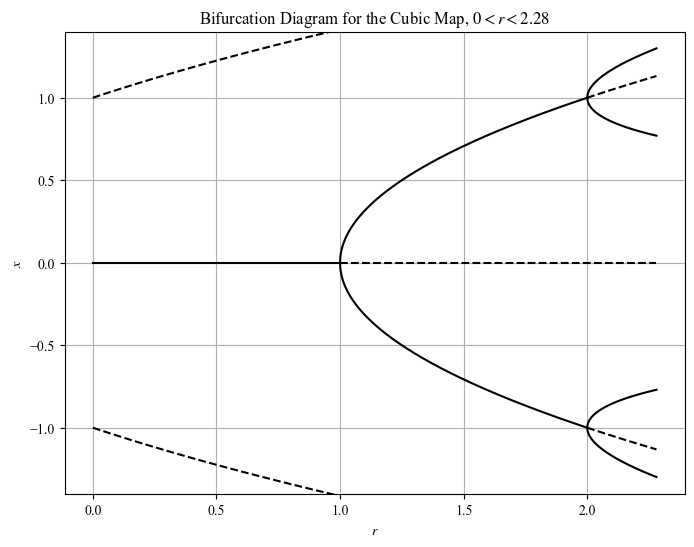

In [6]:
r_1, r_2 = 0, 2.28

fig_OD, ax=plt.subplots(figsize=(8,6))

ax.grid(True)
ax.set_ylim(-1.4,1.4)
ax.set_title(f"Bifurcation Diagram for the Cubic Map, ${r_1}<r<{r_2}$")
ax.set_xlabel('$r$')
ax.set_ylabel('$x$')

#x=0
x = lambda r: np.zeros(len(r))
r = np.linspace(r_1,1,10)
ax.plot(r, x(r), 'k-')
r = np.linspace(1,r_2,10)
ax.plot(r, x(r), 'k--')

#x= +/- sqrt(r+1)
x = lambda r: np.sqrt(r+1)
r = np.linspace(r_1,r_2,1000)
ax.plot(r, x(r), 'k--')
ax.plot(r, -1*x(r), 'k--')

#x= +/- sqrt(r-1)
x = lambda r: np.sqrt(r-1)
r = np.linspace(1,2,1000)
ax.plot(r, x(r), 'k-')
ax.plot(r, -1*x(r), 'k-')
r = np.linspace(2,r_2,1000)
ax.plot(r, x(r), 'k--')
ax.plot(r, -1*x(r), 'k--')

#x= +/- sqrt(r/2+sqrt((r+2)(r-2))/2)
x = lambda r: np.sqrt(r/2 + np.sqrt((r+2)*(r-2))/2)
r = np.linspace(2,r_2,1000)
ax.plot(r, x(r), 'k-')
ax.plot(r, -1*x(r), 'k-')

#x= +/- sqrt(r/2-sqrt((r+2)(r-2))/2)
x = lambda r: np.sqrt(r/2 - np.sqrt((r+2)*(r-2))/2)
r = np.linspace(2,r_2,1000)
ax.plot(r, x(r), 'k-')
_ = ax.plot(r, -1*x(r), 'k-')

### Problem 2

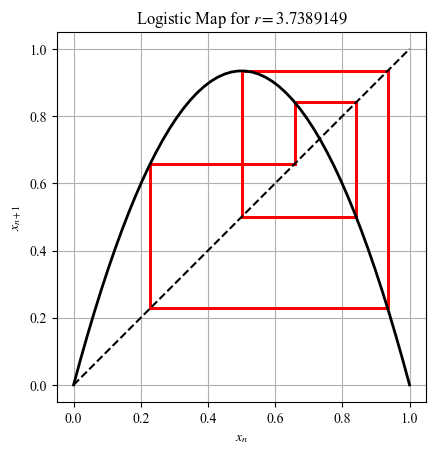

<IPython.core.display.Latex object>

In [7]:
# plot LM cobweb for x1,r1,n1
n1=100; ns=0
x1=0.5; r1=3.7389149
f_LM = lambda x,r: r*x*(1-x)

_, ax=plt.subplots()

dat = logistic_series(x1,r1,n1)
x_ = list(chain(*zip(dat,dat)))
ax.plot(x_[ns:-1],x_[ns+1:],'r-',lw=2)

xx = np.linspace(0,1,50)
ax.plot(xx,xx,'k--')
ax.plot(xx,f_LM(xx,r1),'k-',lw=2)
ax.set_aspect('equal')
ax.grid()
ax.set_title(f'Logistic Map for $r={r1}$')
ax.set_xlabel('$x_n$')
ax.set_ylabel('$x_{n+1}$')
ax.set_xticks(np.arange(0,1.2,0.2))
plt.show()

period = 1
x_o = 60
init_value = dat[x_o]
for data in dat[x_o+1:]:
    if round(data,5) != x1:
        period += 1
    else:
        break

display(Latex(r'$T={}$'.format(period)))

The period of this cycle is 5.

### Problem 3

#### Part (a)

In [8]:
#Description: Segments a line to Koch line
#start: (x,y) coordinate of starting point
#end: (x,y) coordinate of ending point
#factor: the multiple of pi/3 to rotate
def koch_line(start: (float, float), end: (float, float), factor: int):
    x1, y1 = start[0], start[1]
    x2, y2 = end[0], end[1]
    l = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # first point
    a = (x1, y1)
    
    # second point: one third in each direction from the first point
    b = (x1 + (x2 - x1)/3., y1 + (y2 - y1)/3.)
    
    # third point: rotation for multiple of 60 repetitions
    c = (b[0] + l/3. * np.cos(factor * np.pi/3.), b[1] + l/3. * np.sin(factor * np.pi/3.))
    
    # fourth point: two thirds in each direction from the first point
    d = (x1 + 2. * (x2 - x1)/3., y1 + 2. * (y2 - y1)/3.)
    
    # last point
    e = end
    
    return {'a': a, 'b': b, 'c': c, 'd' : d, 'e' : e, 'factor' : factor}

#Description: Generates a von Koch snowflake given the amount of repetitions of the pattern
#repetition: amount of times to repeat the fractal pattern
#s: length of side for the equilateral triangle
def koch_snowflake(repetition: int, s=5.0):
    # all lines of the snowflake
    lines = []
    
    # vertices of the initial equilateral triangle
    A = (0., 0.)
    B = (s, 0.)
    C = (s * np.cos(np.pi / 3), s * np.sin(np.pi / 3))
    
    # set the initial lines
    if repetition == 0:
        lines.append(koch_line(A, B, 0))
        lines.append(koch_line(B, C, 2))
        lines.append(koch_line(C, A, 4))
    else:
        lines.append(koch_line(A, B, 5))
        lines.append(koch_line(B, C, 1))
        lines.append(koch_line(C, A, 3))
    
    for i in range(1, repetition):
        # every lines produce 4 more lines
        for _ in range(3*4**(i - 1)):
            line = lines.pop(0)
            factor = line['factor']

            lines.append(koch_line(line['a'], line['b'], factor % 6))  # a to b
            lines.append(koch_line(line['b'], line['c'], (factor - 1) % 6))  # b to c
            lines.append(koch_line(line['c'], line['d'], (factor + 1) % 6))  # d to c
            lines.append(koch_line(line['d'], line['e'], factor % 6))  # d to e

    return lines

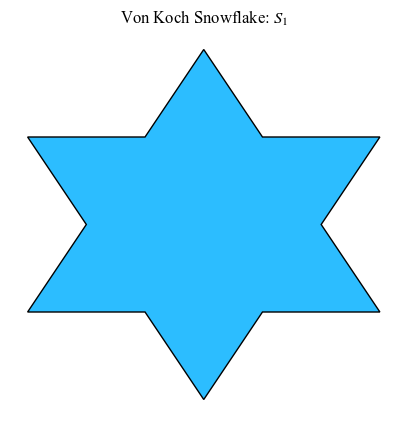

In [9]:
_, ax = plt.subplots(1, 1, figsize=(5, 5))
    
# extract the line coordinates
x, y = [], []
lines = koch_snowflake(repetition=1)
for l in lines:
    x.extend([l['a'][0], l['b'][0], l['c'][0], l['d'][0], l['e'][0]])
    y.extend([l['a'][1], l['b'][1], l['c'][1], l['d'][1], l['e'][1]])
    
ax.set_xticks([], [])
ax.set_yticks([], [])
ax.set_title("Von Koch Snowflake: $S_1$")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
    
_ = ax.fill(x, y, facecolor='#2CBDFF', edgecolor='black', lw=1)

The plot above shows that $S_1$ for the snowflake resembles the star of David.

#### Part (b)

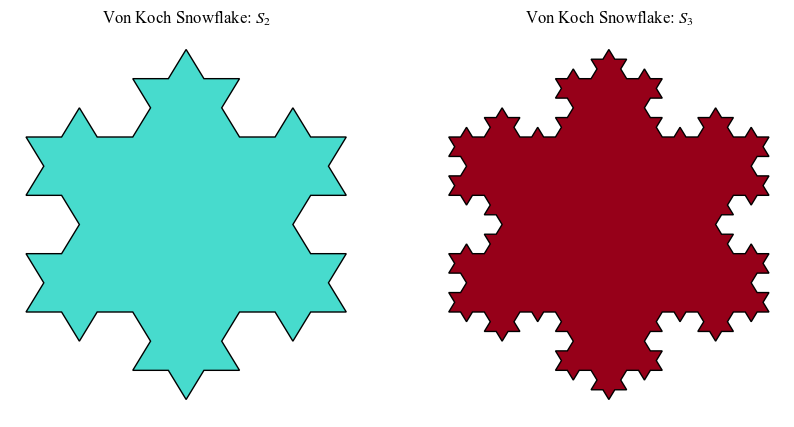

In [10]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))

for i, n in enumerate([2,3]):
    # extract the line coordinates
    x, y = [], []
    lines = koch_snowflake(repetition=n)
    for l in lines:
        x.extend([l['a'][0], l['b'][0], l['c'][0], l['d'][0], l['e'][0]])
        y.extend([l['a'][1], l['b'][1], l['c'][1], l['d'][1], l['e'][1]])
        
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].set_title(f"Von Koch Snowflake: $S_{n}$")
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    facecolor = ['#47DBCD','#960019']
    _ = ax[i].fill(x, y, facecolor=facecolor[i], edgecolor='black', lw=1)

#### Part (c)

Let $L_o$ be the side length of the equilateral triangle form at $S_0$. Let $P_n$ be the perimeter for the shape formed with $S_n$
<br>$P_0=3L_o$
<br>$P_1=3L_o-3(L_o/3)+3*2(L_o/3)=4L_o$
<br>$P_2=4L_o-12((L_o/3)/3)+12*2((L_o/3)/3)=\frac{16L_o}{3}$
<br>$P_n=3(\frac{4}{3})^n L_o$
<br>$P_\infty=\lim_{n\to\infty} P_n \rightarrow \infty$
<br>Since the perimeter of the snowflake is infinity, the arc length is also infinitly long.

#### Part (d)

Let $A_n$ be the area for the shape formed with $S_n$
<br>$A_0=\frac{\sqrt{3}}{4}L_o^2$
<br>$A_1=\frac{\sqrt{3}}{4}L_o^2+3(\frac{\sqrt{3}}{4}(L_o/3)^2)=\frac{\sqrt{3}}{4}L_o^2+\frac{\sqrt{3}}{12}L_o^2$
<br>$A_2=\frac{\sqrt{3}}{4}L_o^2+\frac{\sqrt{3}}{12}L_o^2+12(\frac{\sqrt{3}}{4}(L_o/9)^2)=\frac{\sqrt{3}}{4}L_o^2+\frac{\sqrt{3}}{12}L_o^2+\frac{4\sqrt{3}}{27}L_o^2$
<br>$A_n=\frac{\sqrt{3}}{4}L_o^2 (1+\sum_{k=1}^{n} \frac{3(4)^{k-1}}{9^k})$
<br>$A_{\infty}=\frac{\sqrt{3}}{4}L_o^2 (1+\sum_{k=1}^{\infty} \frac{3(4)^{k-1}}{9^k})=\frac{\sqrt{3}}{4}L_o^2 (1+\sum_{k=0}^{\infty} \frac{3(4)^{k}}{9^{k+1}})=\frac{\sqrt{3}}{4}L_o^2 (1+\frac{3/9}{1-4/9})=\frac{2\sqrt{3}}{5}L_o^2$
<br><br>
The area of the von Koch snowflake $S_\infty$ is $\frac{2\sqrt{3}}{5}L_o^2$.

#### Part (e)

For every iteration, each side creates four new lines with a third of the length of the original. This means that $m=4$ and $r=3$.
<br>$d=\frac{ln(m)}{ln(r)}=\frac{ln(4)}{ln(3)}\approx 1.262$

### Problem 4

In [11]:
def txyz_LE(sigma,r,b,T,dt,xyz0):
    t = np.arange(0,T+dt,dt)
    def RHS(xyz,t):
        x,y,z=xyz
        return[sigma*(y-x),r*x-y-x*z,x*y-b*z]
    sol = odeint(RHS,xyz0,t)
    return [t,sol]

In [12]:
"""
References for later:
-https://github.com/notsebastiano/GP_algorithm/blob/master/GP_algorithm.py
-http://www.scholarpedia.org/article/Grassberger-Procaccia_algorithm
"""

def time_delay_embedding(data: [float], em_dim: int, tau: int):
    indexes = np.arange(0,em_dim,1)*tau
    return np.array([data[indexes + i] for i in range(len(data)-(em_dim-1)*tau)])

#factor > 1
def log_r(min_n, max_n, factor):
    max_i = int(np.floor(np.log(1.0*max_n/min_n) / np.log(factor)))
    return np.array([min_n * (factor ** i) for i in range(max_i+1)])

def grassberg_procaccia(data, em_dim, time_delay, plot=False):
    orbit = time_delay_embedding(data, em_dim, time_delay)
    n = len(orbit)
    data_std = np.std(data)

    r_vals = log_r(0.1*data_std, 0.7*data_std, 1.03)
    distances = np.zeros(shape=(n,n))
    r_matrix = np.zeros(shape=(n,n))

    for i in range(n):
        for j in range(i,n):
            distances[i][j] = np.linalg.norm(orbit[i]-orbit[j])
            r_matrix[i][j] = 1

    C_r = []
    for r in r_vals:
        heavi_matrix = np.heaviside( r_matrix*r - distances, 0)
        corr_sum = (2/float(n*(n-1)))*np.sum(heavi_matrix)
        C_r.append(corr_sum)

    grad = np.gradient(np.log2(C_r), np.log2(r_vals))
    grad.sort()
    D = np.mean(grad[-5:])
    if plot:
		# plot the trend of C(r)
	    plt.plot(np.log2(r_vals),np.log2(C_r))
	    plt.xlabel("Distance $r$")
	    plt.ylabel("$C(r)$")
	    plt.title("Correlation sum in log2-log2 plot. Dimension $d$ is "+str(round(D,2))+" (accepted is $2.05\pm 0.01$)")
	    plt.show()
	
    return D

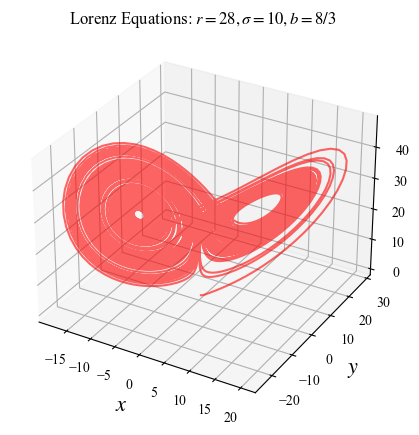

In [13]:
xyz_0 = [0,1,-1]
r, sigma, b = 28,10,8/3.0
T, dt = 100, 0.01
_, xyz = txyz_LE(sigma,r,b, T, dt, xyz_0) 

t0=0; t0_=int(t0/dt)
plt.rcParams['xtick.minor.visible']=False
plt.rcParams['ytick.minor.visible']=False

_, ax = plt.subplots(1,1,figsize=(5,5),subplot_kw={'projection':'3d'})
ax.plot(xyz[t0_:,0],xyz[t0_:,1],xyz[t0_:,2],'r',alpha=0.6)
ax.set_title(f"Lorenz Equations: $r={r},\sigma = {sigma}, b=8/3$")
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
plt.show()

In [ ]:
# Arbitrary time delay
time_delay = 10
timeseries = xyz[200:,0]
em_dim = 4

D = grassberg_procaccia(timeseries,em_dim,time_delay,plot = True)